In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [12,8]

### Logistic regression and regualarization

- Regularization combats overfitting by making the models coefficients smaller

- In sklearn the c and the degree of regularization are inverse, the lower the c, the higher the regularization.

- regularized loss = orginal loss + large coeffiecent penalty
    - more regularization: lower training accuracy
    - more regularization: (almost always) higher test accuracy

- If using a feature too heavily was causing overfitting, then regularization causes you to 'fit less' and thus overfit less. 

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#X_10 = data.data[:, :10]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(data.data)
y = data.target
y[y == 0] = -1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
lr_L1 = LogisticRegression(penalty='l1')
lr_L2 = LogisticRegression()

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

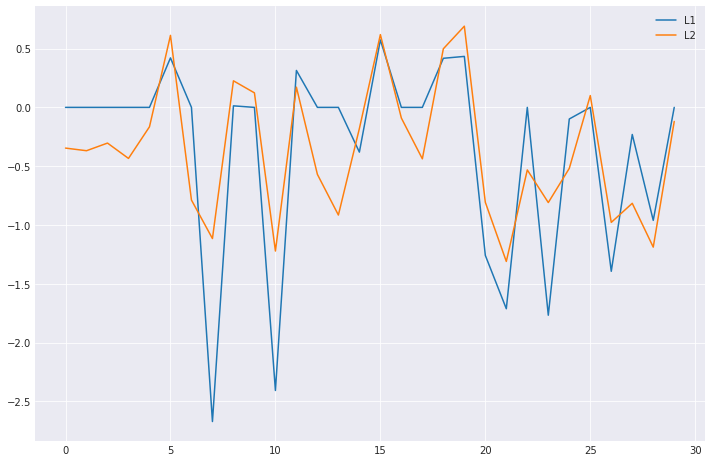

In [6]:
plt.plot(lr_L1.coef_.flatten(), label='L1')
plt.plot(lr_L2.coef_.flatten(), label='L2')
plt.legend()

In [7]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

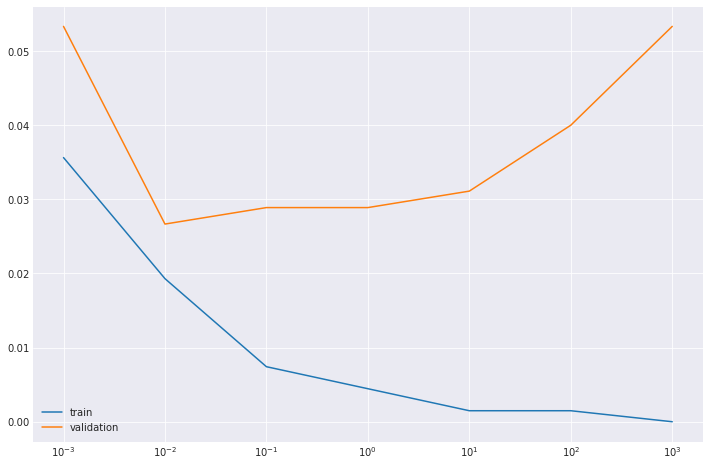

In [8]:
# Train and validation errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value 
for C_value in C_values:
    #Create LogisticRegression object and fit 
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists 
    train_errs.append( 1.0 - lr.score(X_train, y_train))
    valid_errs.append( 1.0 - lr.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(('train', 'validation'))
plt.show()

In [9]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])

y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])


In [10]:
import dc_func as dc 

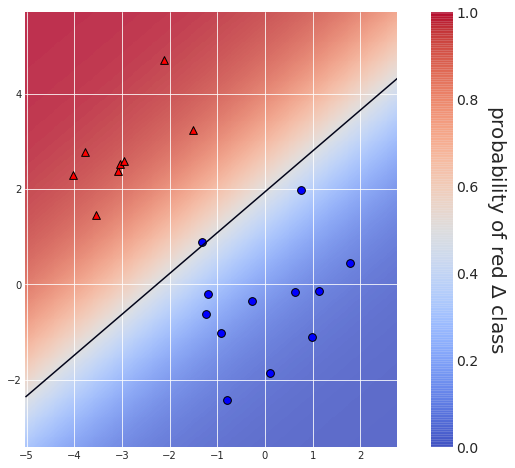

Maximum predicted probability 0.9761229967078282


In [11]:
# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
dc.plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print('Maximum predicted probability', np.max(prob))

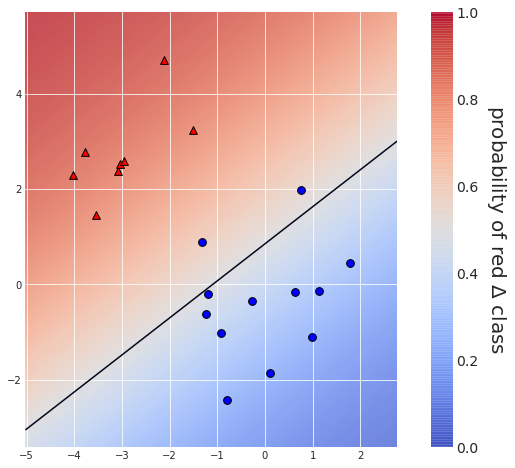

Maximum predicted probability 0.8990965658995651


In [12]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
dc.plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print('Maximum predicted probability', np.max(prob))

In [13]:
X = digits.data
y = digits.target

In [15]:
def show_digit(i, lr=None):
    plt.imshow(np.reshape(X[i], (8,8)), cmap='gray', vmin=0, vmax=16, 
              interpolation=None)
    plt.xticks(())
    plt.yticks(())
    if lr is None:
        plt.title('class label = %d' % y[i])
    else:
        pred = lr.predict(X[i][None])
        pred_proba = lr.predict_proba(X[i][None])[0,pred]
        plt.title('label=%d, prediction=%d, proba=%.2f' % (y[i], pred, pred_proba))
    plt.show()

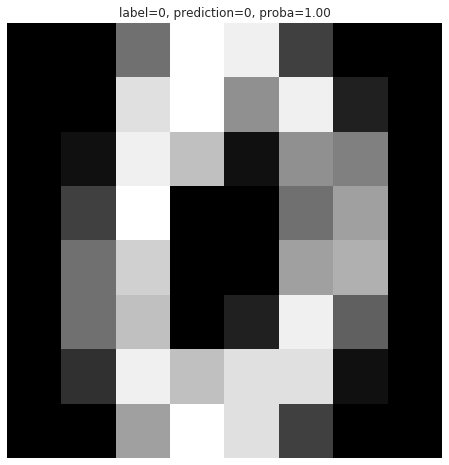

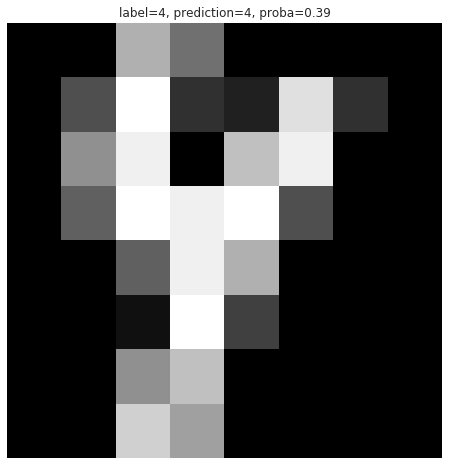

In [17]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximun probability
proba_inds = np.argsort(np.max(proba, axis=1))

# Show the most confident digit
show_digit(proba_inds[-1], lr)

# Show the least confident digit
show_digit(proba_inds[0], lr)

### Multi class logistic regression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [19]:
# Fit one-vs-rest logistic regression classifier 
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier 
lr_mn = LogisticRegression(
            multi_class='multinomial',
            solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OVR training accuracy: 0.994060876020787
OVR test accuracy    : 0.9488888888888889
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9644444444444444


In [24]:
X = np.array([[-2.83895657e-01, -9.51457706e-01],
       [ 5.33624372e-01,  1.23918071e+00],
       [-1.17337815e+00, -1.21258188e-01],
       [-1.19338379e+00,  7.97747166e-01],
       [-3.74902201e-01, -3.99647889e-01],
       [-1.11678880e+00, -3.63057976e-01],
       [ 3.92567929e-02, -1.03949311e+00],
       [-4.60496902e-01,  7.92206150e-01],
       [ 3.73372234e-01,  4.49455588e-01],
       [-5.68303256e-01, -1.12326024e+00],
       [-8.10825377e-01, -6.71197010e-01],
       [-2.23456895e-01,  5.01300063e-01],
       [ 3.31395128e-01, -8.81087488e-01],
       [ 1.23187925e+00,  6.36307263e-01],
       [-1.19438566e-01, -1.70031450e+00],
       [-3.56432381e-01,  8.17597947e-01],
       [ 3.68396844e-01, -4.89405078e-01],
       [-2.55373639e-01, -4.18075333e-01],
       [-1.32645347e+00,  1.04344987e+00],
       [-5.92850474e-01, -8.01421997e-01],
       [ 7.27961902e-01, -1.12489821e+00],
       [-2.13511481e+00,  1.53256634e+00],
       [ 2.30542073e-01, -8.68803803e-01],
       [ 1.09813977e+00,  5.83409537e-01],
       [ 8.38336530e-01,  6.17109567e-01],
       [ 4.86438237e-01,  3.06669383e-01],
       [ 7.86915440e-01,  4.44667097e-01],
       [-4.78932579e-01, -5.66539851e-01],
       [-2.03300554e-01,  9.36879327e-01],
       [ 3.39165831e-01,  8.12534012e-01],
       [-3.61733276e-01,  3.63540549e-01],
       [ 1.18603363e+00, -2.01359716e+00],
       [-4.87253757e-01, -6.37446081e-01],
       [-1.88698497e-01, -5.82874621e-01],
       [ 9.81411621e-01,  1.33941738e+00],
       [ 1.50189299e+00,  1.03081206e+00],
       [-6.44426536e-02, -3.81126339e-01],
       [ 1.28839740e+00,  1.54321683e+00],
       [-9.02379254e-01,  2.12912925e-01],
       [-2.75943790e-01,  6.62190410e-01],
       [ 1.85875489e-04, -2.22687852e+00],
       [-1.36218486e-01, -6.12143582e-01],
       [-8.01189309e-01, -7.31571602e-01],
       [-1.31114360e+00, -1.11160107e-01],
       [-1.82715882e-01,  3.45742341e-01],
       [ 1.62577984e+00,  9.82365559e-02],
       [ 1.18754221e+00, -9.88047256e-01],
       [ 3.30896348e-01,  1.74147081e+00],
       [ 1.06319463e+00,  7.25707477e-01],
       [-6.31172777e-02,  5.03138338e-01],
       [ 3.70221639e-01,  1.27315366e+00],
       [-3.14443989e-03, -2.64384583e-01],
       [ 3.57484301e-01, -2.27657772e-02],
       [-7.10889392e-01,  1.54688358e+00],
       [ 7.62329973e-01,  1.33254405e+00],
       [-1.55233553e+00, -1.52337441e+00],
       [-1.00339689e+00,  2.11862140e+00],
       [ 7.22823193e-01,  3.35405706e-01],
       [ 9.12755253e-02, -5.04468641e-01],
       [ 4.95114934e-02, -2.44690106e-01],
       [-1.40309968e+00, -5.12395416e-01],
       [-7.75501690e-01, -6.02394114e-01],
       [ 1.24435378e+00,  1.05314888e+00],
       [-2.23130848e-02,  1.87403279e+00],
       [-2.22779816e+00,  1.27046867e+00],
       [ 4.42928990e-02,  5.97549446e-01],
       [ 1.14098613e+00,  8.51490630e-01],
       [ 1.44165046e+00, -8.66600209e-01],
       [ 1.32295140e-01,  1.62653413e+00],
       [ 3.69308441e-02,  1.67786453e+00],
       [-6.12975983e-01, -1.35405850e+00],
       [ 8.22080441e-01, -7.45448227e-01],
       [-1.03015455e+00,  1.57828451e+00],
       [-1.27392825e+00, -1.19848757e-01],
       [-4.22882508e-01, -3.05961769e-01],
       [ 1.05127378e+00, -2.29052289e+00],
       [-7.89554501e-01,  8.57037168e-04],
       [ 3.73018740e-01, -4.98468373e-01],
       [-7.21550677e-01, -5.22821271e-01],
       [ 1.91021707e+00, -1.52700869e+00],
       [ 6.18671454e-01,  5.31270233e-01],
       [-1.12104559e+00,  2.87688027e+00],
       [ 1.21061741e+00, -5.48616370e-01],
       [-1.25680616e+00, -6.13281706e-02],
       [-1.50756706e+00,  4.18340765e-01],
       [ 7.11133123e-01, -7.15113895e-01],
       [-4.22620092e-01,  5.79287166e-01],
       [-9.34751978e-01,  3.60387487e-02],
       [ 1.21135650e+00, -5.78726752e-01],
       [-1.15320171e+00, -4.85969087e-02],
       [ 2.62171741e+00,  7.01010427e-01],
       [-1.48673284e-02, -9.33967286e-01],
       [-4.71193685e-01,  1.48297028e-01],
       [ 2.19748594e+00,  8.18579786e-02],
       [ 8.95326539e-01, -8.20358903e-01],
       [-6.17111080e-01,  1.27571264e+00],
       [ 1.09948335e+00, -1.26033634e+00],
       [-2.59602194e-01,  7.62758510e-01],
       [ 8.26861357e-01, -8.98524452e-01],
       [ 1.17328060e+00, -2.02972829e-01],
       [ 9.44652675e-02,  1.11263639e+00],
       [ 7.93685036e-02,  2.91707420e-01],
       [ 8.55134983e-01, -1.86820269e+00],
       [-3.33377592e-02, -8.21471683e-01],
       [ 1.08195801e+00, -9.12742251e-01],
       [-9.59114991e-01, -9.32883669e-01],
       [-1.09944058e-01,  4.29168341e-01],
       [ 8.47500557e-01,  2.00541178e-01],
       [ 8.97969301e-01, -1.34475096e+00],
       [-7.45549265e-01,  3.38558393e+00],
       [-2.35167941e-01,  1.16971717e-01],
       [ 3.82228847e-01, -1.89098191e+00],
       [ 4.46548315e-01, -1.90550205e-01],
       [ 1.03125402e+00, -6.10175894e-01],
       [ 8.98533636e-01, -8.27191628e-01],
       [-1.33555205e+00, -8.75184223e-01],
       [-3.82730422e-01,  1.30044462e+00],
       [ 7.03771022e-02,  3.63324429e-01],
       [-3.82547777e-01, -1.33433884e-02],
       [-9.28831114e-01, -1.24595217e-01],
       [-4.18020419e-01,  4.48693923e-02],
       [-1.14297594e+00, -4.20076628e-01],
       [-1.34085140e+00, -1.04693788e+00],
       [-5.75321695e-01, -1.87324354e+00],
       [ 1.05179314e+00,  1.50698744e-01],
       [-2.41168156e-01, -4.36437276e-01],
       [ 1.46929860e+00, -9.03666003e-01],
       [ 2.39422640e-01, -2.90113812e-01],
       [ 4.08505448e-01,  4.27716109e-01],
       [ 1.03080433e+00, -1.54913404e-03],
       [-1.02676711e+00,  7.21155407e-01],
       [ 1.24298760e+00,  6.05352492e-01],
       [ 9.98158704e-02,  7.85882456e-01],
       [-3.30989273e-01,  1.87923919e-01],
       [ 1.46427195e-01, -7.74987386e-01],
       [ 6.27556539e-01,  2.16992322e+00],
       [ 1.91133871e-01,  1.70918433e+00],
       [-3.87055670e-01, -1.23621603e+00],
       [ 1.30466697e+00,  1.89116566e-01],
       [-1.00664113e+00, -1.82069688e+00],
       [ 2.04048554e-01,  1.18707347e+00],
       [-1.30907152e+00,  5.66034777e-02],
       [ 3.40083444e-01, -9.90222332e-01],
       [ 2.13573178e-01, -2.94037076e+00],
       [-2.36084944e-02, -2.27832455e+00],
       [ 9.22675071e-01,  2.14198658e+00],
       [-8.85698364e-01, -1.82381255e+00],
       [-1.55801959e+00,  7.58114660e-01],
       [ 1.48191669e+00, -7.29229056e-01],
       [ 3.45873152e+00,  3.45013732e-01],
       [-3.87080518e-01,  1.11669888e+00],
       [ 4.38763001e-01,  6.12595812e-01],
       [ 6.72911640e-01,  1.14420429e+00],
       [ 8.93632281e-01,  3.54641572e-01],
       [-6.90807494e-01, -4.59634838e-01],
       [-4.15753108e-01,  2.07834911e+00],
       [ 4.17739748e-01,  1.15217233e+00],
       [-6.49536218e-01, -1.29778992e+00],
       [ 8.79936159e-01, -1.17037420e+00],
       [ 1.32963509e+00,  7.77819970e-01],
       [ 1.67576848e+00,  3.71978129e-01],
       [-1.00808260e+00,  2.57843572e-01],
       [ 1.53015384e+00,  2.27643840e-01],
       [-6.18754318e-01, -6.41954617e-01],
       [-8.71107452e-01,  3.11477892e-01],
       [ 6.37622987e-01,  2.03146691e+00],
       [-3.10980526e-01, -1.79036690e-01],
       [-6.45468284e-01, -1.25491015e+00],
       [ 4.71158947e-01, -2.39641054e+00],
       [-6.47038417e-01,  7.45740049e-01],
       [ 1.11893355e-01,  9.23820401e-02],
       [ 2.46226478e-01,  3.13062906e-01],
       [-1.01089039e-01,  3.62849379e-02],
       [ 1.71659568e-01, -1.35927630e+00],
       [ 3.40480960e-01,  1.16674832e+00],
       [-2.56618477e-01,  2.08152722e+00],
       [ 1.53315515e+00,  2.88728123e-01],
       [-5.31455590e-01,  4.13138729e-01],
       [ 1.39559634e+00,  1.21110653e-01],
       [-2.21472479e-01,  5.40642292e-01],
       [-4.96250861e-01, -3.33320300e-01],
       [ 6.16439064e-01, -1.03542338e+00],
       [-3.12897613e+00,  4.76362013e-01],
       [-6.99437789e-01, -1.75830724e-01],
       [ 1.71519587e+00,  1.01602638e-01],
       [ 5.19186062e-01, -1.35492173e+00],
       [ 6.82204596e-01,  8.73433968e-01],
       [-1.08581585e+00,  1.75168166e-01],
       [-4.22907282e-01, -5.65107061e-01],
       [-3.71555929e-01, -1.42305714e+00],
       [-8.21577003e-01,  5.28010495e-01],
       [ 7.86870071e-02,  9.24843550e-02],
       [-2.16193119e-01,  5.86193381e-01],
       [-1.22548359e+00,  2.48846802e-01],
       [-1.55000064e+00,  1.56518980e+00],
       [-9.60286755e-01, -3.40835920e-01],
       [-1.21420118e+00, -3.54183421e-01],
       [-6.17941477e-01,  8.49677284e-02],
       [-1.26821697e+00,  1.53634503e+00],
       [-1.04121511e-01, -3.09345590e-01],
       [-3.24089313e-01,  9.14684501e-02],
       [-3.46051731e-01,  2.71948412e-01],
       [ 5.49168052e-01, -7.03300534e-02],
       [-6.29554699e-02, -8.28104012e-02],
       [-1.66552903e-01, -6.81026187e-01],
       [-1.86519153e+00, -8.10162292e-01],
       [ 5.66593537e-02, -4.18745854e-01],
       [ 2.34711021e+00, -3.27882927e-02],
       [ 6.42344993e-01,  4.65635453e-01],
       [ 8.19580983e-01, -1.38034832e+00],
       [-1.27525615e+00,  1.62592404e+00],
       [ 4.18990622e-01, -2.34217819e-01],
       [-6.45499218e-01, -1.68068271e-01],
       [ 5.87115685e-01,  1.26968048e+00],
       [-1.38994421e+00, -3.17576787e-01],
       [ 1.33279793e+00,  5.91125442e-01],
       [-1.14989342e+00, -6.18127175e-01],
       [-4.78690715e-01, -1.60450115e+00],
       [ 1.54541507e+00,  1.55276018e-01],
       [ 7.28423987e-01, -3.30380155e-01],
       [-1.07899557e+00,  9.56753137e-01],
       [ 1.73158536e+00, -1.45930768e+00],
       [-8.50859191e-01,  9.46701140e-01],
       [ 6.85189932e-01, -5.03068765e-01],
       [ 6.67027648e-01,  6.86137104e-01],
       [ 2.52037478e+00,  6.25413897e-01],
       [ 1.23372005e+00,  2.51603284e-01],
       [ 5.81184053e-02,  4.51137245e-02],
       [-2.01775288e-01, -8.08414669e-01],
       [-2.83241465e+00,  7.23569524e-01],
       [ 1.11794340e+00,  2.66169426e-01],
       [-1.48414526e+00,  1.41802404e+00],
       [-2.17997557e-01, -4.27031273e-01],
       [ 1.05131170e+00,  1.03823987e+00],
       [ 4.73478589e-01,  2.22850843e+00],
       [ 3.79073150e-01, -4.04320588e-01],
       [-4.85248870e-01, -4.63422678e-01],
       [-6.52513292e-01, -8.00667406e-02],
       [-1.10638994e-01, -9.52893744e-02],
       [ 9.72278149e-01, -6.81695817e-01],
       [-5.74704425e-01,  5.46743761e-01],
       [ 2.61211937e-01, -9.00517980e-02],
       [-3.13766608e-01,  2.99858742e-01],
       [-7.53824274e-01, -3.62056163e-01],
       [-8.57537689e-01,  2.70991980e+00],
       [ 1.17612860e-01,  8.06824976e-01],
       [ 5.63697109e-01,  6.45696112e-01],
       [-1.43600626e+00,  5.59475465e-01],
       [-6.51804104e-01, -6.72113868e-01],
       [ 7.44253455e-01,  5.70717760e-01],
       [-5.96343760e-01, -1.18964250e+00],
       [ 5.96500258e-01,  2.00513480e+00],
       [ 9.46339546e-01,  8.25057696e-01],
       [-9.49552255e-01, -2.12707718e+00],
       [ 7.77784328e-01,  4.12740359e-01],
       [-2.14872339e-02, -3.21881539e-01],
       [ 4.64142337e-01,  4.71265171e-01],
       [-1.00162254e+00,  5.59504404e-02],
       [ 4.22650852e-01,  7.07834832e-01],
       [-4.19091926e-01,  4.21446505e-04],
       [ 3.80532136e-01, -8.62496826e-01],
       [-6.88095193e-01,  3.83724014e-03],
       [-1.38296737e+00,  1.01773102e+00],
       [-1.56727614e-01, -1.00625917e-01],
       [-7.02790559e-01, -5.34264482e-01],
       [ 4.53674228e-01,  2.26399723e-01],
       [-3.70977024e-01, -9.02532647e-01],
       [ 9.95739869e-01, -4.29823772e-01],
       [ 3.21633047e-01, -4.81996737e-01],
       [-3.59761073e-01, -5.19486660e-01],
       [ 2.63949169e-01,  2.54547095e+00],
       [ 4.00202410e-01,  2.16159036e+00],
       [ 8.54602127e-01, -1.08544729e+00],
       [ 1.17409647e-01,  6.72164886e-03],
       [-2.96916269e+00, -7.24299000e-01],
       [ 8.98734164e-01,  2.03360105e+00],
       [ 9.14885199e-01,  2.08795727e+00],
       [ 3.52225950e-01,  1.11807396e-01],
       [-5.02642449e-01, -8.94881511e-01],
       [-2.07926031e-01, -2.26007844e-01],
       [-2.98067495e-01,  1.21007972e+00],
       [ 5.59552710e-01,  6.16856924e-01],
       [-2.13331328e-01, -1.37176907e+00],
       [-7.71592298e-01,  2.56522853e-01],
       [-8.91009324e-02,  5.85928029e-01],
       [-6.59158060e-01,  8.93140184e-01],
       [-1.66256529e-01, -9.80095936e-01],
       [-1.45293634e+00, -6.79306038e-01],
       [ 2.58459533e-01, -1.59507701e+00],
       [-6.16562642e-01,  3.37553869e-01],
       [ 1.99332380e+00,  3.76100676e-01],
       [ 1.31749904e+00,  1.14525370e+00],
       [ 6.77627652e-01, -2.69028412e+00],
       [-7.24054641e-01, -3.00028828e-01],
       [-2.15908250e-01,  1.73361026e+00],
       [-4.26627903e-01,  3.95005345e-02],
       [ 1.13473732e+00, -2.06468477e-01],
       [ 1.56815803e+00, -1.47455508e-01],
       [ 7.86715120e-01, -2.32062876e-01],
       [ 9.87933166e-01,  1.60843618e-01],
       [ 1.90729163e+00,  1.27409312e-01],
       [ 3.59355853e-01, -1.04640821e+00],
       [-9.46647182e-01,  6.22098825e-01],
       [-2.46689280e-01,  2.57307271e-01],
       [ 2.67800451e-01,  4.40998924e-01],
       [-1.83371684e+00, -1.07635433e+00],
       [-7.32318763e-02,  1.25985823e+00],
       [ 6.97274340e-01, -4.56201361e-01],
       [ 9.15469974e-02,  3.47279873e-01],
       [-1.34215495e-01,  1.53634006e+00],
       [-2.01959589e-01,  7.40056156e-01],
       [ 1.29536211e+00, -1.79185232e+00],
       [ 6.35987451e-01,  1.34724258e-02],
       [-7.52186057e-02,  2.37048909e-01],
       [-7.38858807e-01,  4.31069515e-03],
       [ 2.76485783e+00, -1.04532813e+00],
       [-8.28286409e-01,  4.96139031e-01],
       [ 6.72941893e-01, -3.08256204e-01],
       [ 3.56320956e-01, -1.71854210e-01],
       [-1.83052452e-01,  9.93778673e-01],
       [ 6.07162324e-01, -4.87940009e-01],
       [-1.45724708e+00, -5.57288015e-01],
       [-1.95713287e-02, -7.27061061e-01],
       [-3.03595807e-01,  2.45310326e-01],
       [ 4.25748084e-01, -2.73044964e-01],
       [ 1.28042925e+00, -2.17265698e+00],
       [ 1.13616284e+00, -7.01750647e-01],
       [-5.15620443e-01,  4.27429863e-01],
       [ 1.17568017e+00, -1.09936359e-01],
       [-1.36411847e+00, -3.62075361e-02],
       [-3.03338789e-01,  2.32516450e+00],
       [ 4.21265199e-01, -1.48184608e+00],
       [-1.56356664e+00,  2.43979829e-01],
       [-1.89370094e+00, -1.34857851e+00],
       [-1.81369673e+00, -1.04035943e+00],
       [-1.30487016e+00, -6.09707799e-02],
       [-3.87350229e-01, -1.20156767e+00],
       [ 1.85116618e+00, -2.47765287e-02],
       [ 2.55609131e-01,  4.43817616e-01],
       [-7.23423000e-01,  6.87936650e-01],
       [ 7.19675853e-01,  1.63807539e+00],
       [ 4.07528586e-01, -4.57875958e-01],
       [ 1.27239160e+00,  7.54197611e-01],
       [-7.33084811e-01, -1.22625870e+00],
       [-1.00146686e+00,  8.22587011e-01],
       [ 8.74280306e-01, -4.28087542e-02],
       [-2.60254075e+00, -1.04374295e-01],
       [ 2.47129653e-01, -2.39347095e-01],
       [-1.32192531e+00, -2.47002839e-01],
       [-1.50342772e+00,  8.14205321e-01],
       [ 1.31894693e+00, -7.79305377e-01],
       [ 1.07114856e+00,  5.61995551e-01],
       [-9.48056016e-01,  4.62884142e-01],
       [-1.47049629e+00, -3.10810395e-01],
       [-1.52246111e+00, -1.50083105e+00],
       [ 6.62394356e-01,  2.32762068e-01],
       [-1.77646954e+00,  1.80796912e+00],
       [-1.33919576e+00,  4.00842900e-01],
       [ 4.55071208e-01, -8.87571298e-01],
       [-9.27020245e-03, -1.02678468e+00],
       [ 7.87715149e-01, -4.74965423e-01],
       [-6.80287514e-01,  7.01827786e-01],
       [ 2.34664160e-01,  1.02683424e+00],
       [ 8.36586885e-03, -2.05581122e-01],
       [ 1.87547736e+00,  8.75869903e-01],
       [-3.47955037e-01,  1.95290688e+00],
       [-7.67038989e-01,  9.10960121e-02],
       [ 2.63033753e-01,  4.72970318e-01],
       [ 3.09943712e-02,  1.95394133e+00],
       [-1.13433110e+00, -1.95408174e+00],
       [-9.01631724e-02, -3.38637356e-01],
       [ 1.10103317e-01,  1.61216978e+00],
       [ 1.49961133e+00,  2.21729968e-01],
       [-1.18243595e+00,  9.17843166e-01],
       [-1.15438675e+00, -1.19451959e+00],
       [-1.96908372e+00,  1.61768855e+00],
       [ 1.04567355e+00,  1.07875346e+00],
       [ 7.72705301e-01,  9.98823749e-01],
       [-1.35997652e+00, -4.98768895e-01],
       [-9.04834584e-01,  2.33921986e-01],
       [-4.95178016e-01, -4.39195245e-02],
       [-5.93938849e-01,  1.42820254e+00],
       [ 5.59304094e-01, -1.15873862e+00],
       [ 2.16040528e-01, -8.17380088e-02],
       [ 1.91528001e-01, -1.69325925e+00],
       [ 1.10434170e+00,  2.84340339e-01],
       [-1.09580513e+00,  5.86898099e-01],
       [ 6.32328497e-01, -5.91375311e-01],
       [ 2.03614132e+00, -3.90471672e-01],
       [ 5.38816211e-01,  1.25914174e+00],
       [ 1.03704347e+00, -2.23606708e-01],
       [ 1.19372766e+00, -1.14210183e+00],
       [ 1.51355134e+00, -5.83971183e-01],
       [-1.07182512e+00, -6.52605083e-01],
       [-4.77214399e-02,  5.16168230e-01],
       [-7.41155815e-01, -2.03127300e-01],
       [-5.26219209e-01,  9.80301155e-01],
       [-1.72741909e+00, -1.65621733e-01],
       [ 6.08561524e-01, -1.45370511e-01],
       [ 2.68417609e-01,  4.10423630e-01],
       [ 3.35639118e+00, -1.76397176e-01],
       [ 7.24257981e-01, -3.60339382e-01],
       [ 1.06875286e-01, -1.85461448e-01],
       [-2.17547662e+00,  1.31572316e+00],
       [ 7.05906132e-01, -2.16529995e-03],
       [-1.37692376e+00, -2.09079539e+00],
       [ 2.46229942e-01, -1.12744334e+00],
       [ 8.02523744e-01,  7.75491394e-02],
       [ 1.91706758e+00,  1.43183414e+00],
       [ 3.73242087e-01, -2.27227927e+00],
       [-1.44161294e+00, -9.97108872e-01],
       [-5.28857450e-01, -1.87424747e+00],
       [ 1.43258736e+00, -3.37113081e-02],
       [ 2.07234655e-01, -3.09076870e-01],
       [ 3.90215099e-01,  8.72054171e-01],
       [ 7.45161918e-01, -1.87417848e+00],
       [-8.99287804e-01,  4.02730489e-01],
       [-4.91389477e-01,  3.07685767e-01],
       [-5.11938656e-01,  1.47585371e+00],
       [ 1.52300602e+00,  2.58514757e-01],
       [ 4.24973478e-02,  2.57461361e-01],
       [-9.04075115e-01,  9.96421859e-01],
       [-2.10108887e-01,  4.44708778e-02],
       [ 1.03676621e+00, -8.92949123e-01],
       [ 4.53475954e-01, -8.41371282e-02],
       [ 1.27061789e+00, -1.67840458e-01],
       [-2.80065465e-01, -2.03211468e+00],
       [-2.30813912e+00, -1.29304958e+00],
       [-7.74356188e-01,  3.19574013e-01],
       [ 1.87887312e-01, -2.45362957e-01],
       [-4.72937053e-01, -1.27600645e+00],
       [ 1.22272244e+00,  2.87961812e-01],
       [-1.47938168e+00,  4.78233386e-01],
       [ 3.44089778e-01,  9.24369569e-01],
       [-1.47820336e-01,  1.78836253e-01],
       [-2.61313086e+00,  7.06282124e-01],
       [ 2.06035418e+00,  1.21243436e+00],
       [-9.60549064e-01, -2.29243260e+00],
       [ 4.33027171e-01,  1.16868694e+00],
       [ 9.03617320e-01, -9.07428912e-01],
       [-4.29349702e-01,  2.08682098e-01],
       [ 1.18723781e+00,  9.60222494e-01],
       [ 8.70232033e-01, -7.31800954e-01],
       [-8.39153310e-01,  4.25780276e-01],
       [ 9.10585432e-01,  4.83166022e-01],
       [-1.42955178e-01, -3.48926918e-01],
       [-1.76109418e+00, -5.47684733e-01],
       [ 7.12915565e-01, -1.20512064e+00],
       [ 1.99865471e+00,  1.11107025e+00],
       [ 6.08398173e-01,  6.44423717e-02],
       [-3.15608408e-01,  2.14631103e-01],
       [-1.05242232e+00, -3.29021132e-01],
       [ 1.71535143e-01,  1.58322635e+00],
       [-6.35773050e-01, -1.56803626e+00],
       [-8.89829669e-01, -1.39746713e+00],
       [-5.07586883e-01,  1.22201642e+00],
       [-1.61711936e+00, -1.47048434e+00],
       [-9.29768710e-02, -1.75262884e+00],
       [ 3.69138690e-01,  8.05857912e-01],
       [ 2.94671774e-01,  5.80944613e-01],
       [ 3.70936983e-01, -9.85710205e-02],
       [-9.25708081e-01, -7.22894280e-01],
       [-1.11548831e+00, -9.57694317e-01],
       [-1.18669763e+00, -7.42497045e-01],
       [-2.24840754e-01, -5.93059064e-02],
       [-6.41667586e-01,  5.37284099e-01],
       [ 2.37396532e-01, -5.76700064e-01],
       [ 2.54272550e+00, -1.63058088e+00],
       [-8.87373181e-01,  1.95202568e-02],
       [ 3.84847607e-01, -7.51008417e-01],
       [-1.46282978e+00,  3.08199826e-01],
       [-3.66702316e-01, -2.23582305e+00],
       [ 6.43664449e-01, -8.32684408e-01],
       [-2.04183218e+00,  4.87795183e-01],
       [ 1.13515625e+00, -9.85409189e-01],
       [ 1.28410505e+00,  1.43881405e+00],
       [ 5.85979267e-01,  7.46602215e-01],
       [-6.93376209e-01, -8.44376740e-01],
       [ 1.45451916e+00,  1.05476312e-01],
       [ 2.38609334e-01, -4.31543600e-02],
       [-5.12863852e-01, -1.35550194e+00],
       [-1.24472169e+00,  1.62495117e-01],
       [-2.12720688e-01,  4.06861023e-01],
       [ 3.63530110e-01,  1.25938338e+00],
       [ 1.10058109e+00,  9.84706123e-01],
       [-5.35740682e-01, -1.74105144e+00],
       [ 5.35714841e-01,  5.41693020e-01],
       [-9.70468122e-01,  1.14890818e+00],
       [-1.09988936e+00, -4.78052396e-01],
       [ 1.27920406e+00, -8.08848981e-01],
       [-1.36798424e+00,  3.99855057e-01],
       [ 1.01065618e+00, -2.62314558e-01],
       [ 1.34576187e+00, -4.47251284e-01],
       [-3.68049070e-01, -3.43437389e-01],
       [-4.96020550e-01, -4.62734100e-01],
       [-1.24062149e+00, -2.13638805e+00],
       [-5.52547887e-01, -1.10351078e+00],
       [ 8.85081661e-01,  4.38362730e-01],
       [ 9.43883760e-01,  1.26227065e-02],
       [-4.29917047e-02,  7.78520148e-01]])

y = np.array([4, 2, 4, 1, 4, 4, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 4, 4, 1, 4, 3, 1,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 3, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 3, 3, 2, 2, 2, 2, 4, 4, 5, 2, 4, 5, 2, 4, 4, 4, 4, 2, 2, 1, 2,
       2, 3, 2, 2, 4, 3, 5, 4, 4, 3, 4, 4, 4, 3, 2, 5, 3, 4, 4, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 4, 3, 4, 2, 2, 3, 5,
       4, 3, 4, 3, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 4, 3, 4, 2, 3, 4, 2,
       2, 4, 4, 2, 2, 4, 3, 4, 2, 4, 4, 3, 4, 2, 4, 4, 3, 3, 2, 2, 2, 2,
       4, 5, 2, 4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 4, 3, 1, 4, 2, 4, 4, 2, 5,
       3, 4, 3, 2, 4, 3, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 2, 4, 1, 4, 4, 4,
       1, 4, 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 5, 4, 4, 2, 4, 2, 4, 4, 3, 3,
       1, 3, 1, 3, 2, 3, 2, 4, 4, 4, 2, 1, 4, 2, 2, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 5, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 1, 4,
       4, 2, 4, 3, 4, 4, 2, 2, 3, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 1,
       4, 4, 4, 4, 3, 2, 3, 4, 2, 4, 3, 3, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3,
       2, 2, 2, 3, 2, 4, 4, 3, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4,
       5, 4, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 2, 4, 1, 2, 4, 4, 4, 4, 3, 2,
       4, 4, 4, 2, 5, 4, 4, 4, 3, 4, 2, 4, 2, 5, 4, 2, 2, 4, 4, 2, 3, 1,
       4, 1, 2, 2, 4, 4, 4, 5, 3, 4, 4, 2, 4, 3, 3, 2, 3, 3, 3, 4, 2, 4,
       1, 4, 2, 2, 3, 3, 4, 1, 2, 4, 4, 2, 2, 3, 4, 4, 3, 4, 2, 3, 4, 4,
       5, 3, 4, 1, 4, 3, 2, 3, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 2, 3,
       4, 2, 3, 4, 2, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 1, 4, 4, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 2, 2, 4, 3, 4, 4, 4, 4, 2,
       2, 4, 2, 1, 4, 3, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#?train_test_split

In [27]:
lr_mn = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

lr_ovr = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

lr_mn.fit(X_train, y_train)
lr_ovr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Softmax     training accuracy: 0.9971428571428571
One-vs-rest training accuracy: 0.9257142857142857


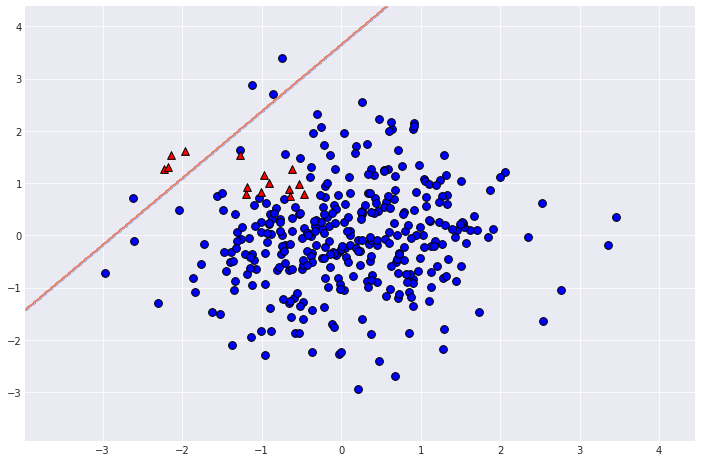

In [28]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
dc.plot_classifier(X_train, y_train==1, lr_class_1)

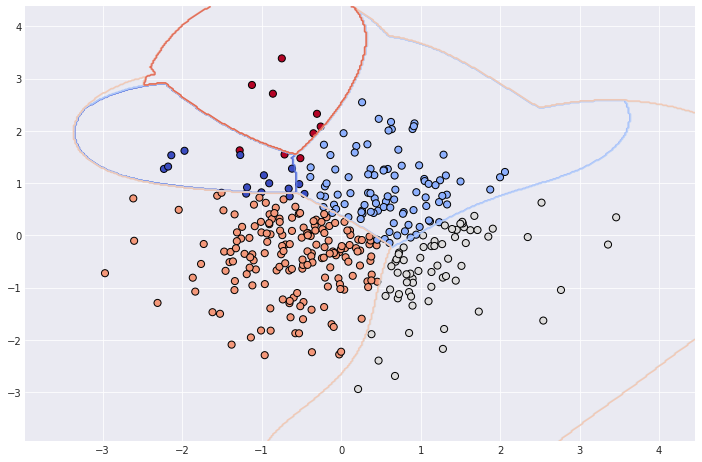

In [30]:
# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train)
dc.plot_classifier(X_train, y_train, svm_class_1)